### Integrantes, G6:

* Juan Jose Alvarez Villada
* Carlos Daniel Bolivar Zapata
* Santiago Monsalve Acevedo
* Lis Adrian Morales Gonzalez
* Carlos Alejandro Torres Albarracin

# DISCRETIZACIÓN DE BACTERIAS PORMEDIO DE VISIÓN ARTIFICIAL

### Problema
Este documento presenta una solución a una problemática de salud pública, ya que es un tema desconocido para muchos se presenta de forma general la condición de la problemática en Colombia y las soluciones y restricciones en otros países. El uso de antibióticos para control de enfermedades en el área agrícola es muy común, con la diferencia que existe la tendencia de usar antibióticos veterinarios para control de bacterias en frutos como el tomate. Por falta de regulación y rigurosidad los alimentos contaminados están afectando la población ya que tienen libre distribución sin importar los bactericidas que se les apliquen.

### Descripción de la solución
Inserte texto aqui

### Muestras para el estudio
<br>
<div style="display:flex">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (1).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (2).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (3).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (4).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (5).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (6).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (7).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (8).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (9).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (10).jpeg">
</div>
<div style="display:flex">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (11).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (12).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (13).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (14).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (15).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (16).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (17).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (18).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (19).jpeg">
    <img width=25% style="margin: 5px" src="res/bacterias/1 (20).jpeg">
</div>

Insertar descripción técnica aquí y más imagenes

### Librerias necesarias para el estudio 

In [1]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage
import skimage.color as color
import skimage.io
import skimage.morphology as morph
import warnings
from skimage.measure import label, regionprops
from PIL import Image
import glob
warnings.filterwarnings('ignore')

### Preprocesamiento

En la imagen se pueden encontrar algunas regiones borrosas, esto representa un problema para el conteo, ya que no se logra visualizar las separaciones entre las bacterias.

Para corregir esta complicación, se aplica un filtro gausseano; ésto le dará un toque de nitidez a la imagen.

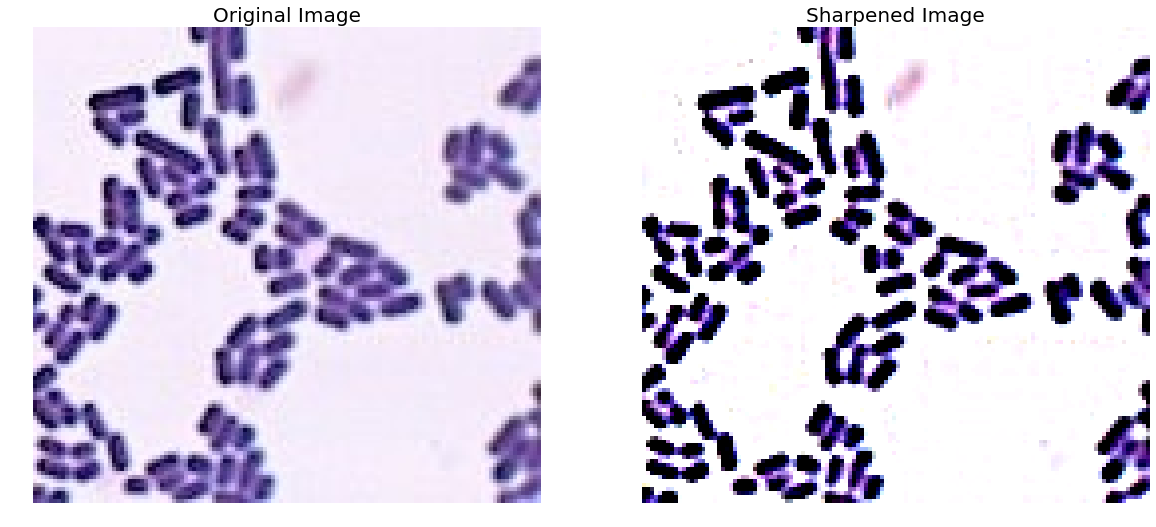

In [17]:
im = cv2.imread("res/bacterias/1 (19).jpeg", cv2.IMREAD_COLOR)
im  = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_blurred = cv2.GaussianBlur(im, (9,9), 100)
img = cv2.addWeighted(im, 1.0 + 3.0, im_blurred, -3.0, 0)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(im), 
plt.axis('off'), plt.title('Original Image', size=20)
plt.subplot(122),plt.imshow(img), 
plt.axis('off'), plt.title('Sharpened Image', size=20)
plt.show()

### Análisis de canales de color:
Inicialmente se analizan los canales RGB y LAB para encontrar un histograma que ayude a determinar un umbral para facilitar la segmentación, ya que en esta imagen se ven claramente colores predominantes.

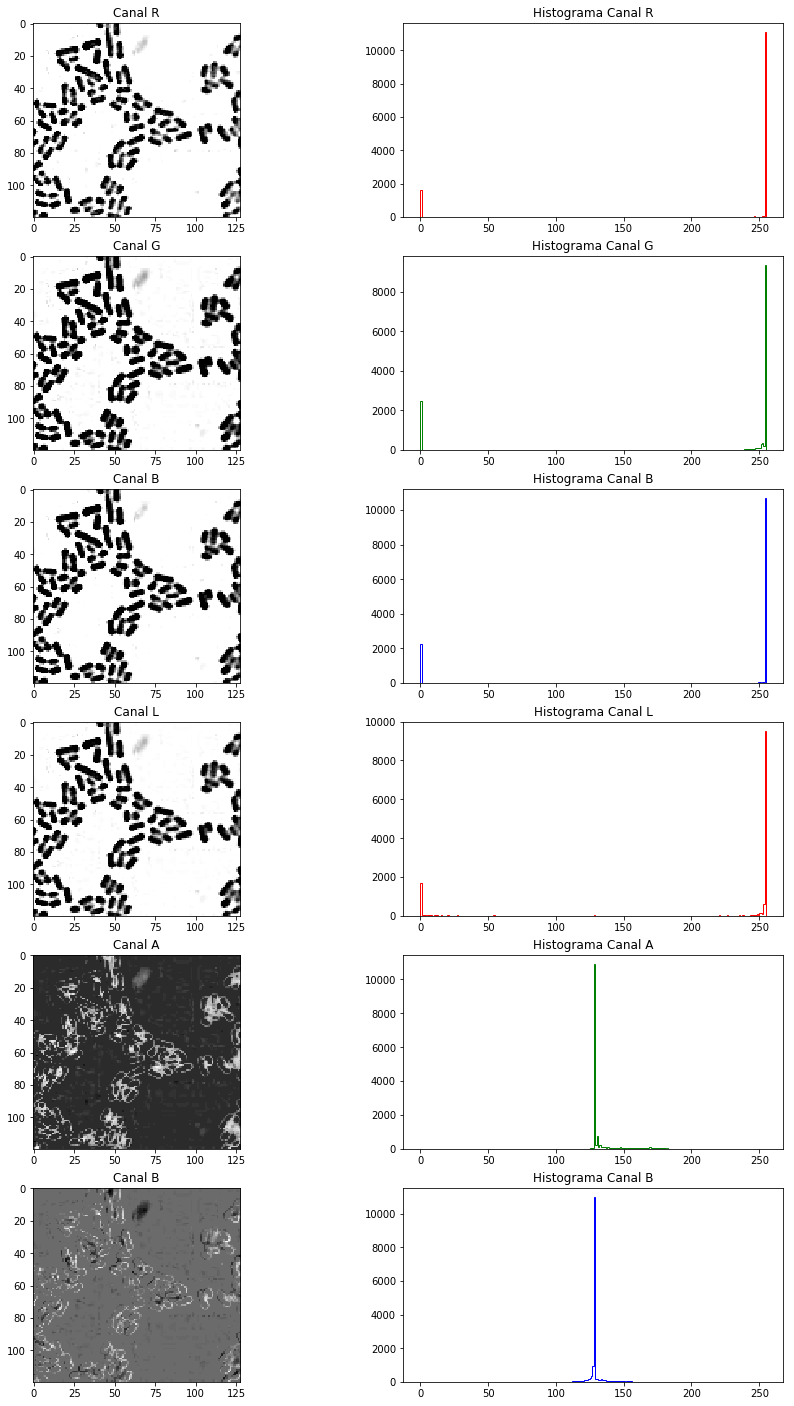

In [3]:
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_BB = img_lab[:,:,2]

fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))
colors = ('r','g','b')

#HISTOGRAMAS CANAL RGB
arreglo_plots[0,0].set_title('Canal R')
arreglo_plots[0,0].imshow(img_R, cmap="gray")
arreglo_plots[0,1].set_title('Histograma Canal R')
img_array_i = img_rgb[:,:,0].ravel()
arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[0])

arreglo_plots[1,0].set_title('Canal G')
arreglo_plots[1,0].imshow(img_G, cmap="gray")
arreglo_plots[1,1].set_title('Histograma Canal G')
img_array_i = img_rgb[:,:,1].ravel()
arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[1])
    
arreglo_plots[2,0].set_title('Canal B')
arreglo_plots[2,0].imshow(img_B, cmap="gray")
arreglo_plots[2,1].set_title('Histograma Canal B')
img_array_i = img_rgb[:,:,2].ravel()
arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[2])

#HISTOGRAMAS CANAL LAB
arreglo_plots[3,0].set_title('Canal L')
arreglo_plots[3,0].imshow(img_L, cmap="gray")
arreglo_plots[3,1].set_title('Histograma Canal L')
img_array_i = img_lab[:,:,0].ravel()
arreglo_plots[3,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[0])

arreglo_plots[4,0].set_title('Canal A')
arreglo_plots[4,0].imshow(img_A, cmap="gray")
arreglo_plots[4,1].set_title('Histograma Canal A')
img_array_i = img_lab[:,:,1].ravel()
arreglo_plots[4,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[1])
    
arreglo_plots[5,0].set_title('Canal B')
arreglo_plots[5,0].imshow(img_BB, cmap="gray")
arreglo_plots[5,1].set_title('Histograma Canal B')
img_array_i = img_lab[:,:,2].ravel()
arreglo_plots[5,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0), color=colors[2])

plt.show()

El canal R del RGB, en éste caso es el mejor, ya que se puede observar que no hay tantos puntos gruesos que pueden ser un grupo de bacterias tan cercanas que no se distinguen bien.

### Segmentación por umbral.
Se decide trabajar con una segmentación por umbral ya que la imagen solo tiene dos picos de colores, en el siguiente paso se determina el umbral adecuado para lograr una mínima pérdida de información.

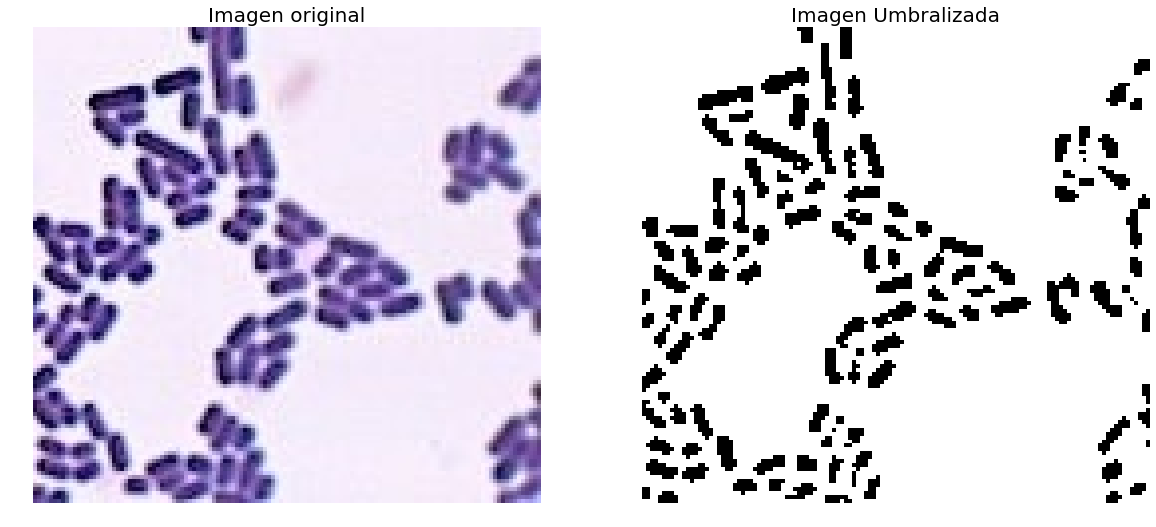

In [4]:
#Tomar solamente los valores de la imagen mayores a 60
thresholded = img_R > 60
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(im), 
plt.axis('off'), plt.title('Imagen original', size=20)
plt.subplot(122),plt.imshow(thresholded,cmap = 'gray'), 
plt.axis('off'), plt.title('Imagen Umbralizada', size=20)
plt.show()

Si se realiza una superposición de estas dos imagenes, se pueden observar algunas fallas en cuanto a puntos que se contaria como bacteria, pero en realidad no son:<br>
<br>
<div style="display:flex">
    <img width=45% src="res/falla1.jpeg">
    <img width=40% src="res/falla2.jpeg">
</div>
<br>
Se sabe que estos puntos son parte de una bacteria, se deberia pegar cada punto diminuto a su bacteria correspondiente.
La primera meta es hallar la mínima área posible y luego comenzar a aplicar un relleno de regiones.


### Busqueda de areas por segmento
Se realiza una extracción de características de toda la imagen, se elige el Momento 00, perímetro y área. Ya que en nuestro caso estas características tienen significacia para determinar que es una bactería y que es ruido. 

In [5]:
label_img = label(thresholded )
# Momento 00 -> brillo y area
#Generar un vector de propiedades de la región
props = regionprops(label_img)
propiedades = []
for segmento in props:
    propiedades.append([segmento.moments[0][0],segmento.perimeter,segmento.area])
df = pd.DataFrame(propiedades,columns = ["Momento 00","Perimetro","Area"])

df.head()

,Momento 00,Perimetro,Area
0,13143.0,2611.311975,13143
1,1.0,0.000000,1
2,1.0,0.000000,1


Lo anterior demuestra que hay diminutos pixeles que no se deberian considerar en el conteo.

Con esta información se puede realizar un relleno de regiones con las áreas que se consideran ruido, para identificar las bacterias.

### Relleno de agujeros

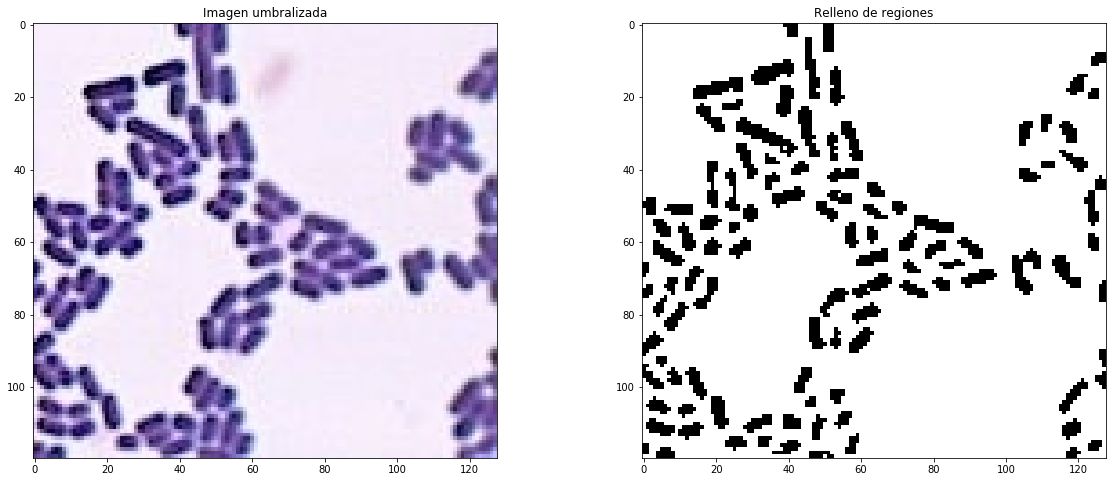

In [6]:
imgR = thresholded.copy() 
#Realizar un llenado de agujeros pequeños, cuyos parámetros son la imagen que deseo rellenar
#y el área mínima a partir de la cual se llenará el hueco
filled = morph.remove_small_holes(imgR,min_size=6) #min_size es el area en pixeles de los huecos a rellenar

#Crear subplot 1x2 que muestre imagen original e imagen rellena
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 8))
ax1.set_title('Imagen umbralizada')
ax1.imshow(im, cmap='gray')
ax2.set_title('Relleno de regiones')
ax2.imshow(filled, cmap='gray')
plt.show()

Se considera 6 como el área mínima para realizar el relleno de regiones ya que logra eliminar el ruido obtenido al aplicar la umbralización

### Conteo:
Finalmente se aplica el conteo a la imagen en general, utilizando un etiquetado de componentes conexas.

Numero de bacterias: 106


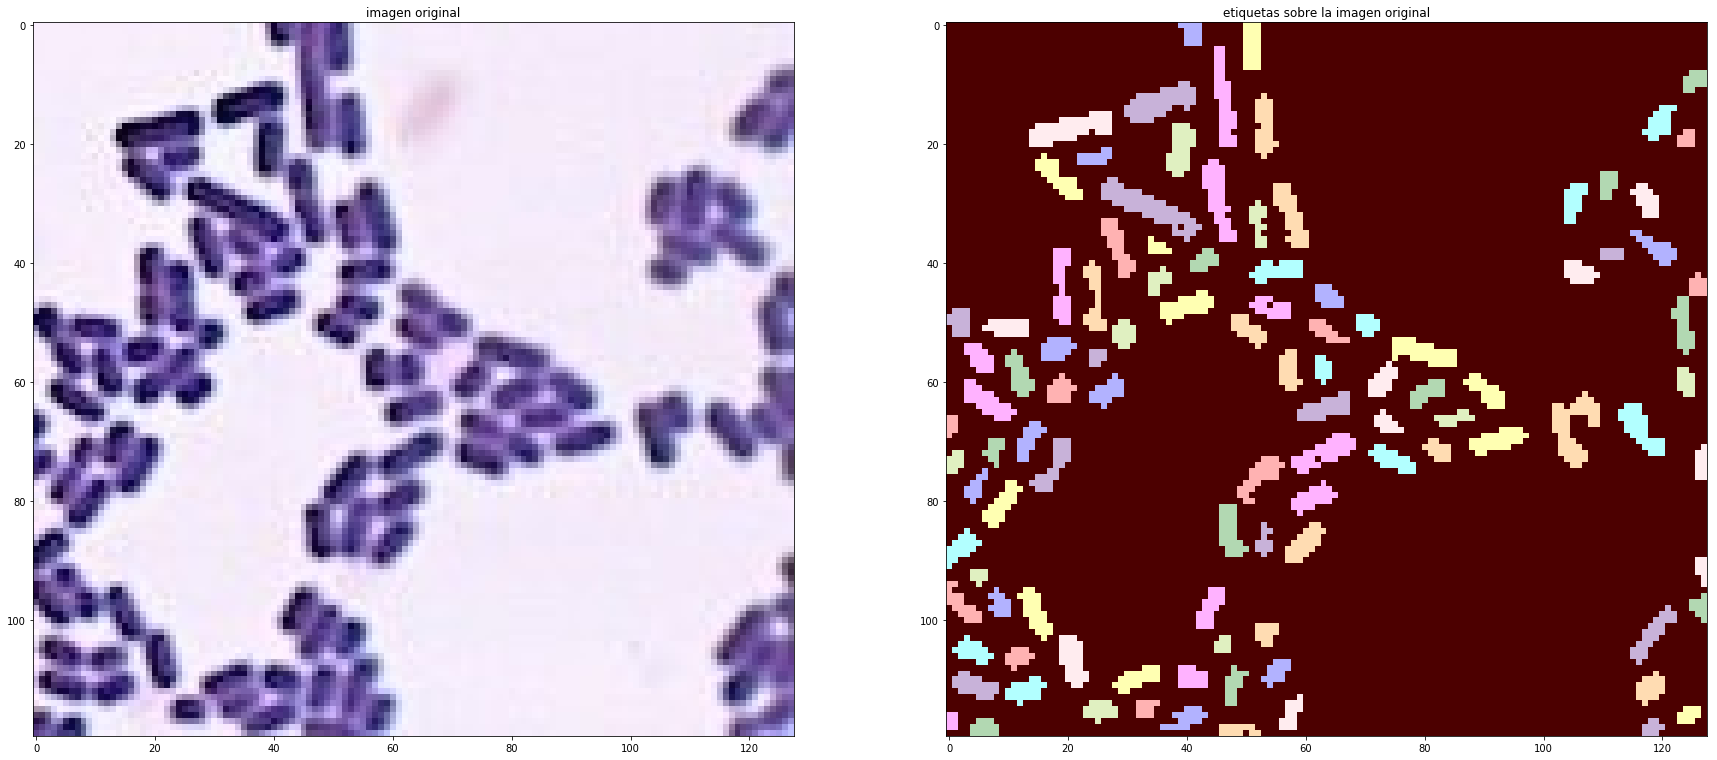

In [7]:
img = ~filled

radius = 0.8

selem = morph.disk(radius)


#Etiquetar la imagen mediante la función label de skimage, cuyos parámetros son la imagen
#el número de vecinos, la conectividad
labels, num_labels = morph.label(img, neighbors=4, return_num=True,background = 0, connectivity= 0)

#Caracterizar los labels, mediante colores y sobre la imagen original
image_label_overlay = color.label2rgb(labels, image=img)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,20))

ax1.set_title('imagen original')
ax1.imshow(im, cmap='gray')
ax2.set_title('etiquetas sobre la imagen original')
ax2.imshow(image_label_overlay, cmap='jet')

print("Numero de bacterias:", num_labels)

Para verificar este conteo se realizará el conteo a ojo y otro con el algoritmo planteado, para calcular una efectividad del procedimiento.

Por ejemplo la imagen anterior tiene 110 bacterias, como el resultado fue 106 se tiene un error del 4.

### Lectura de muestras

In [8]:
reales = [110,102,110,127,113,91,100,115,115,94,118,125,85,102,74,75,82,107,69,70]
imgs = []
for i in range(0,20):
    im = cv2.imread("res/bacterias/1 ("+str(i)+").jpeg", cv2.IMREAD_COLOR)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imgs.append({"img": im,"resultado_real":reales.pop()})

### Funcion de conteo de bacterias

In [10]:
def contarBacterias(im):
    im_blurred = cv2.GaussianBlur(im, (9,9), 100)
    img = cv2.addWeighted(im, 1.0 + 3.0, im_blurred, -3.0, 0)
    img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_R = img_rgb[:,:,0]
    thresholded = img_R > 60
    imgR = thresholded.copy() 
    filled = morph.remove_small_holes(imgR,min_size=6) #min_size es el area en pixeles de los huecos a rellenar
    img = ~filled
    radius = 0.8
    selem = morph.disk(radius)
    #Etiquetar la imagen mediante la función label de skimage, cuyos parámetros son la imagen
    #el número de vecinos, la conectividad
    labels, num_labels = morph.label(img, neighbors=4, return_num=True,background = 0, connectivity= 0)
    #Caracterizar los labels, mediante colores y sobre la imagen original
    image_label_overlay = color.label2rgb(labels, image=img)
    return num_labels

### Conteo de bacterias en todas las muestras

In [25]:
resultados = []
for i,img in enumerate(imgs):
    contadas = contarBacterias(img['img'])
    reales = img['resultado_real']
    resultados.append([contadas,reales, abs(contadas - reales)*100/reales])
df = pd.DataFrame(resultados, columns = ['Algoritmo','Reales','Error'])
df

,Algoritmo,Reales,Error
0,77,70,10.000000
1,86,69,24.637681
2,118,107,10.280374
3,98,82,19.512195
4,98,75,30.666667
5,89,74,20.270270
6,132,102,29.411765
7,102,85,20.000000
8,125,125,0.000000
9,121,118,2.542373


In [39]:
print("El error promedio del algoritmo es: %d%s con 20 muestras" % (round(df.mean()["Error"],5),'%'))

El error promedio del algoritmo es: 10% con 20 muestras
